<h3>good ~ medium quality ECG data 분석</h3>

In [3]:
import heartpy as hp
import matplotlib.pyplot as plt

sample_rate = 250

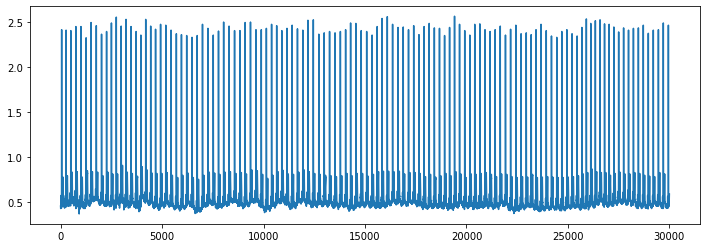

In [4]:
data = hp.get_data('e0103.csv')

plt.figure(figsize=(12,4))
plt.plot(data)
plt.show()

좋은 신호 그래프를 그리고 있기 때문에 전처리 필요 없이 바로 분석이 가능


bpm: 59.697000
ibi: 1005.075630
sdnn: 45.612021
sdsd: 17.278462
rmssd: 30.487563
pnn20: 0.483051
pnn50: 0.118644
hr_mad: 28.000000
sd1: 21.545153
sd2: 59.911382
s: 4055.167506
sd1/sd2: 0.359617
breathingrate: 0.166667


/Users/hoho/hoho_dir/Development/github/Multi-Modality-Person-Recognition/venv/lib/python3.8/site-packages/heartpy/visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 864x288 with 0 Axes>

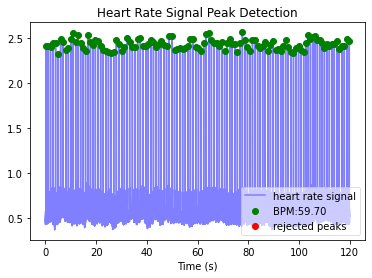

In [5]:
wd, m = hp.process(data, sample_rate)

plt.figure(figsize=(12, 4))
hp.plotter(wd, m)

for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

<hr>

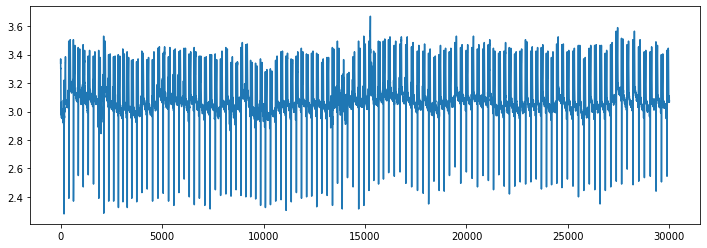

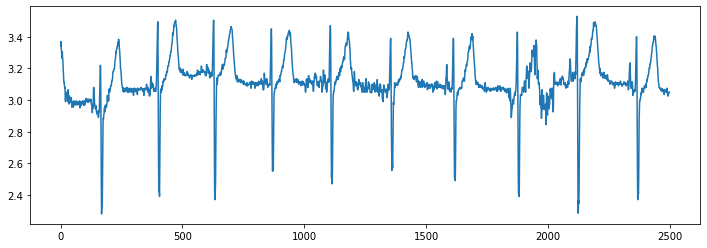

In [6]:
data = hp.get_data('e0110.csv')

plt.figure(figsize=(12,4))
plt.plot(data)
plt.show()

plt.figure(figsize=(12,4))
plt.plot(data[0:2500])
plt.show()

QRS 파형이 보인 다음 T-wave가 위치한 곳에 문제가 있음. notch filter로 필터링 가능.<br><br>
notch filter는 매우 좁은 주파수 범위를 필터링함. 따라서 QRS 파형을 방해하지 않고 장애물을 없앨 수 있음.<br>

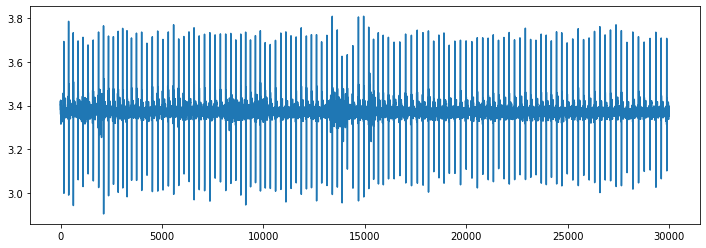

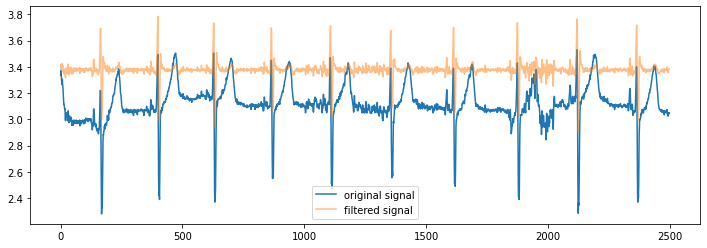

In [8]:
filtered = hp.filter_signal(data, cutoff = 0.05, sample_rate = sample_rate, filtertype='notch')

plt.figure(figsize=(12,4))
plt.plot(filtered)
plt.show()

plt.figure(figsize=(12,4))
plt.plot(data[0:2500], label = 'original signal')
plt.plot(filtered[0:2500], alpha=0.5, label='filtered signal')
plt.legend()
plt.show()

위 과정에 따라 T-wave의 진폭을 줄였음. 분석할 준비가 됨

bpm: 57.843015
ibi: 1037.290323
sdnn: 60.906871
sdsd: 20.513036
rmssd: 33.059617
pnn20: 0.493827
pnn50: 0.135802
hr_mad: 36.000000
sd1: 23.285718
sd2: 84.305770
s: 6167.324586
sd1/sd2: 0.276206
breathingrate: 0.133333


/Users/hoho/hoho_dir/Development/github/Multi-Modality-Person-Recognition/venv/lib/python3.8/site-packages/heartpy/visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 864x288 with 0 Axes>

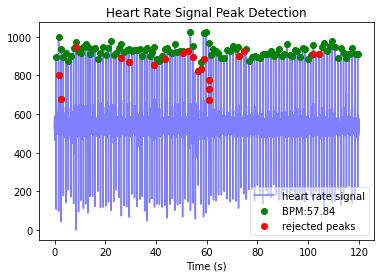

In [9]:
wd, m = hp.process(hp.scale_data(filtered), sample_rate)

plt.figure(figsize=(12,4))
hp.plotter(wd, m)

for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

HeartPy에서 몇몇 피크를 신뢰하지 못하고있음. HeartPy optimizer가 broader peak를 윈하기 때문임. <br><br>
보통 문제를 발생 시킬 여지가 있는 peak width의 감소를 필터링 할 때 일어남.

bpm: 58.018220
ibi: 1034.157895
sdnn: 59.536305
sdsd: 21.549303
rmssd: 34.825073
pnn20: 0.544643
pnn50: 0.133929
hr_mad: 35.000000
sd1: 24.588644
sd2: 80.051446
s: 6183.774312
sd1/sd2: 0.307161
breathingrate: 0.166667


/Users/hoho/hoho_dir/Development/github/Multi-Modality-Person-Recognition/venv/lib/python3.8/site-packages/heartpy/visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 864x288 with 0 Axes>

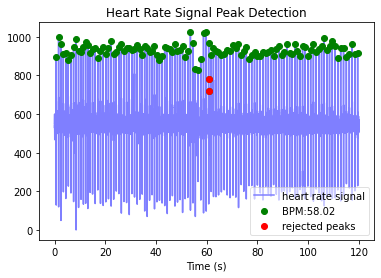

In [10]:
from scipy.signal import resample

resampled_data = resample(filtered, len(filtered) * 2)

wd, m = hp.process(hp.scale_data(resampled_data), sample_rate*2)

plt.figure(figsize=(12,4))
hp.plotter(wd, m)

for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

signal을 업샘플링해 HeatPy가 최적화하고 모든 피크치의 위치를 찾아내도록 했음.
<br><br>처리 함수인 hp.scale_data()을 기억하는 게 좋음. 이 함수는 진폭이 낮을 때 추천됨. (원본 데이터에서는 2.4~3.8)
<hr>

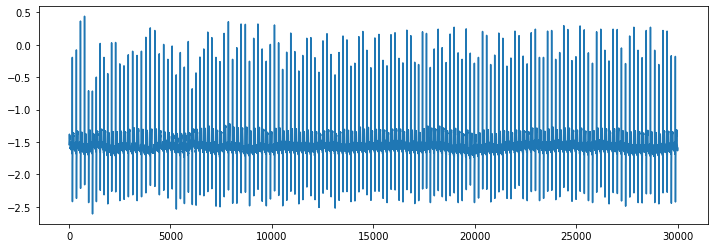

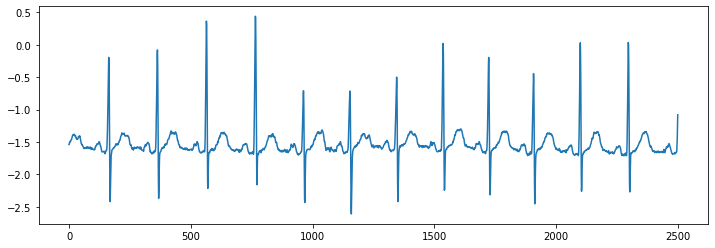

In [11]:
data = hp.get_data('e0124.csv')

plt.figure(figsize=(12,4))
plt.plot(data)
plt.show()

plt.figure(figsize=(12,4))
plt.plot(data[0:2500])
plt.show()

강한 신호가 나타나 바로 분석이 가능함.

bpm: 74.642232
ibi: 803.834483
sdnn: 25.854237
sdsd: 8.060314
rmssd: 13.118076
pnn20: 0.104895
pnn50: 0.000000
hr_mad: 16.000000
sd1: 9.272843
sd2: 35.470837
s: 1033.318549
sd1/sd2: 0.261422
breathingrate: 0.300000


/Users/hoho/hoho_dir/Development/github/Multi-Modality-Person-Recognition/venv/lib/python3.8/site-packages/heartpy/visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 864x288 with 0 Axes>

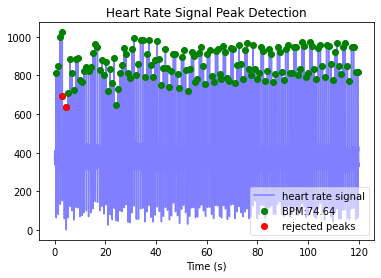

In [12]:
wd, m = hp.process(hp.scale_data(data), sample_rate)

plt.figure(figsize=(12,4))
hp.plotter(wd, m)

for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

다시 업샘플링 과정에서 신뢰할 수 없는 피크치가 나타남

bpm: 74.700944
ibi: 803.202703
sdnn: 25.987252
sdsd: 8.037765
rmssd: 13.000262
pnn20: 0.095238
pnn50: 0.000000
hr_mad: 14.000000
sd1: 9.192447
sd2: 35.707405
s: 1031.191456
sd1/sd2: 0.257438
breathingrate: 0.300000


/Users/hoho/hoho_dir/Development/github/Multi-Modality-Person-Recognition/venv/lib/python3.8/site-packages/heartpy/visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 864x288 with 0 Axes>

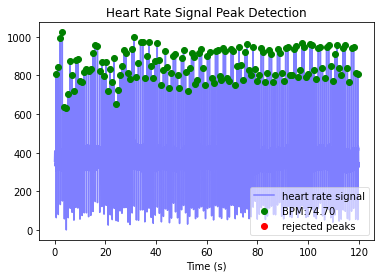

In [14]:
resampled_data = resample(data, len(filtered) * 2)

wd, m = hp.process(hp.scale_data(resampled_data), sample_rate * 2)

plt.figure(figsize=(12,4))
hp.plotter(wd, m)

for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))


nonlinear poincare measures:
sd1: 9.192447
sd2: 35.707405
s: 1031.191456
sd1/sd2: 0.257438


/Users/hoho/hoho_dir/Development/github/Multi-Modality-Person-Recognition/venv/lib/python3.8/site-packages/heartpy/visualizeutils.py:299: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


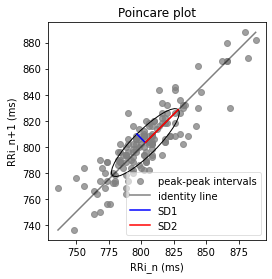

In [15]:
hp.plot_poincare(wd, m)

poincare_measures = ['sd1', 'sd2', 's', 'sd1/sd2']
print('\nnonlinear poincare measures:')
for measure in poincare_measures:
    print('%s: %f' %(measure, m[measure]))

위와 같이 poincare plot으로 나타낼 수 있음.